----------------------
# Fundamentals of Data Analytics - Project 2020
### Eoin Lees - G00387888 - January 2021
--------------

# Instructions

In this project you must perform and explain simple linear regression using Python
on the powerproduction dataset available on Moodle. The goal is to accurately predict
wind turbine power output from wind speed values using the data set as a basis.
Your submission must be in the form of a git repository containing, at a minimum, the
following items:

1. Jupyter notebook that performs simple linear regression on the data set.
2. In that notebook, an explanation of your regression and an analysis of its accuracy.
3. Standard items in a git repository such as a README.

To enhance your submission, you might consider comparing simple linear regression to
other types of regression on this data set. Rest assured, all the above concepts will be
explored in lecture videos and other materials in the coming semester.

---------------------------
# Introduction

---------------------------

Explination of purpose of project. 

Explination of dataset

Explination of lineat regression
sources

## Import modules and plot styles

In [2]:
#Import Modules
import pandas as pd
import matplotlib.style as style
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [3]:
# Stlyes available for plots
style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [4]:
style.use('fivethirtyeight')

## Import Data

In [5]:
dfpowprod = pd.read_csv("https://raw.githubusercontent.com/eoinlees/FoDA-Project-2020/main/powerproduction.csv")
dfpowprod

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


## Initial  analysis and plots

In [18]:
# Describe variables
for col in dfpowprod:
    print(f"Descriptive statistics for variable: {col}")
    print(dfpowprod[col].describe())
    print()

Descriptive statistics for variable: speed
count    500.000000
mean      12.590398
std        7.224991
min        0.000000
25%        6.324750
50%       12.550500
75%       18.775250
max       25.000000
Name: speed, dtype: float64

Descriptive statistics for variable: power
count    500.000000
mean      48.014584
std       41.614572
min        0.000000
25%        5.288000
50%       41.645500
75%       93.537000
max      113.556000
Name: power, dtype: float64



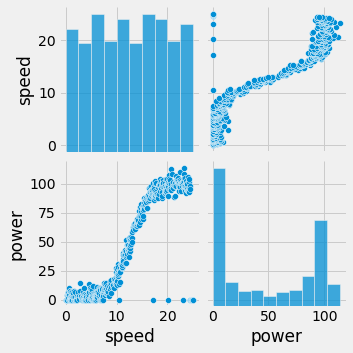

In [15]:
# https://seaborn.pydata.org/generated/seaborn.pairplot.html
sns.pairplot(dfpowprod);

### Research

displot vs distplot

uses for each. why one is being removed

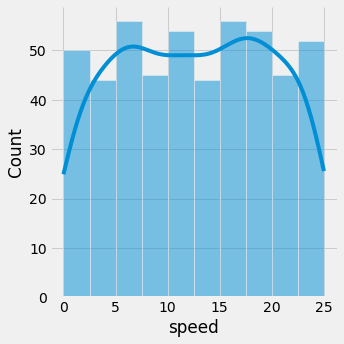

In [11]:
sns.displot(dfpowprod["speed"], kde=True);

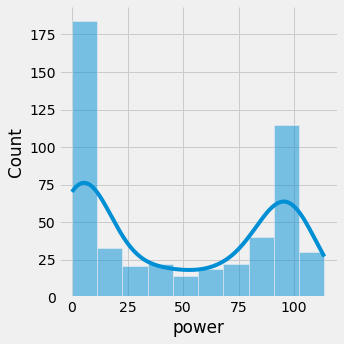

In [10]:
sns.displot(dfpowprod["power"], kde=True);

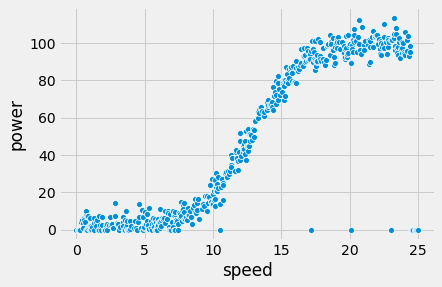

In [8]:
sns.scatterplot(data=dfpowprod, x="speed", y="power");

# Explination + analysis


Loads of analysis! Explain everything

Whats a regplot? regression? 

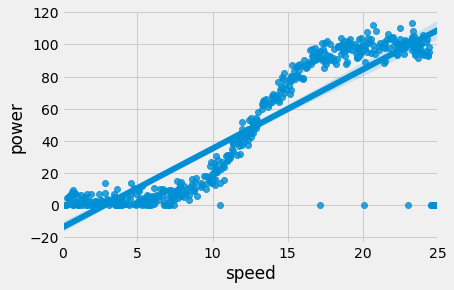

In [9]:
sns.regplot(x="speed", y="power", data=dfpowprod);

 ## https://seaborn.pydata.org/tutorial/regression.html
 
 Refer to this for correct plots
 
 research complex linear regression - curved lines
 
 https://seaborn.pydata.org/generated/seaborn.regplot.html
 
 --------------

# Linear Regression

--------------------------

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

linear regression model? 

In [18]:
# Perform linear regression
lr = LinearRegression()

# convert data into numpy array
X = dfpowprod.speed.values.reshape(-1, 1)
Y = dfpowprod.power.values.reshape(-1, 1)


lr.fit(X, Y)

# Y predictions off of X values
Y_pred = lr.predict(X)


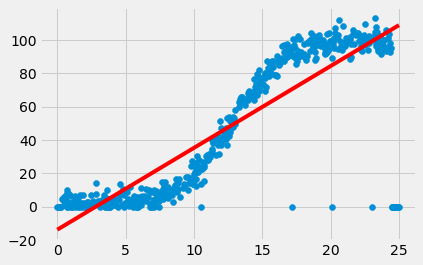

In [22]:
# Visualise the results

# create scatterplot from dataset
plt.scatter(X,Y)

# create regression line
plt.plot(X, Y_pred, color='red')

# show plot
plt.show()

 linik to plot above [[1]](https://towardsdatascience.com/linear-regression-in-6-lines-of-python-5e1d0cd05b8d)

-------------------------
# Results
-------------------------

-------------------------
# Analysis
-------------------------

# Conclusions




# References
------------------------

[1] https://towardsdatascience.com/linear-regression-in-6-lines-of-python-5e1d0cd05b8d